In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
plt.rcParams["figure.figsize"] = (20,20)

### View the original image

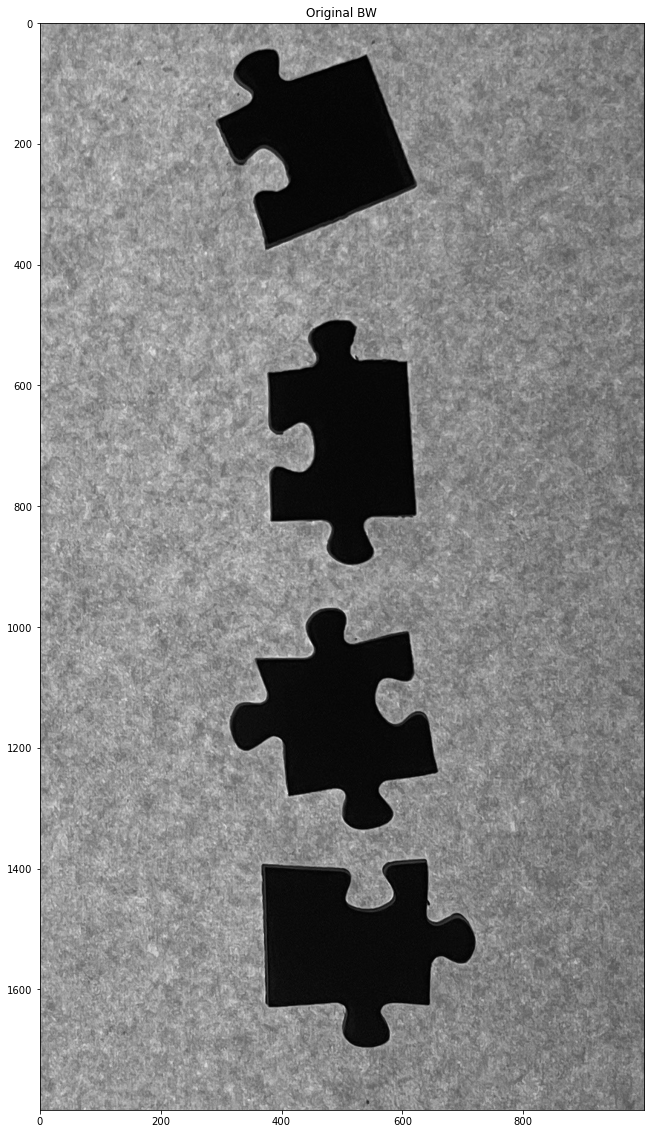

In [5]:
filename="06.jpg"
puzzles_ori = cv2.imread(filename)
puzzles_ori = cv2.cvtColor(puzzles_ori, cv2.COLOR_BGR2GRAY)
puzzles = puzzles_ori[1200:3000,1500:2500] # crop digitized version
plt.imshow(puzzles, cmap='gray'); plt.title("Original BW"); plt.show()

### Find the 4 pieces / connected components

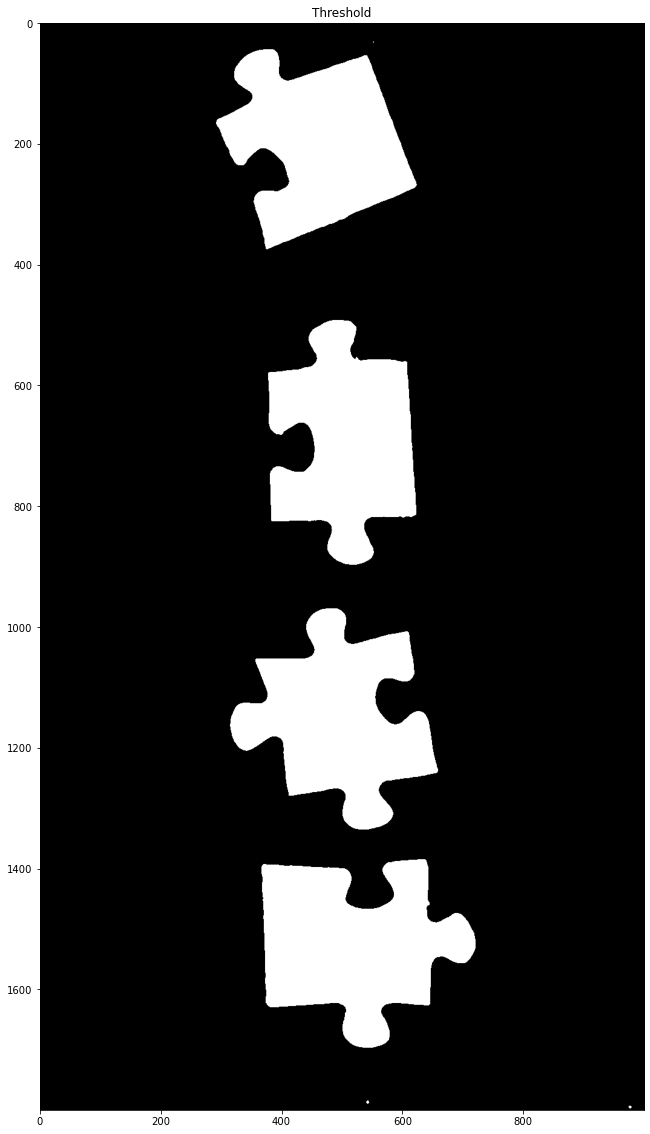

In [9]:
blurred = cv2.blur(puzzles, (5, 5))
best = cv2.threshold(blurred, 80, 255, type=cv2.THRESH_BINARY)[1]
best = ~ best
plt.imshow(best, cmap='gray'); plt.title("Threshold"); plt.show()

In [26]:
out = cv2.connectedComponentsWithStats(best)

()

In [27]:
np.argsort(out[:,-1])[:-1]

array([[0, 1, 2, 3, 4],
       [2, 3, 4, 1, 0],
       [1, 0, 3, 2, 4],
       [2, 0, 3, 1, 4],
       [0, 2, 3, 1, 4],
       [3, 2, 0, 1, 4],
       [2, 3, 4, 0, 1],
       [2, 3, 4, 0, 1]], dtype=int64)

In [28]:
def return_puzzle_pieces(image, num):
    temp = cv2.connectedComponentsWithStats(image) #find connected components and return stats
    stats = temp[2]
    idx = stats[:,-1] # filter to last column
    idx = np.argsort(idx) # find index of largest ones
    idx = idx[-num-1:-1]
    return_obj = []
    for i in range(num):
        meta = stats[idx[i]]
        x = meta[0]
        y = meta[1]
        width = meta[2]
        height= meta[3]
        puzzle = image[y: y+height, x:x+width]
        old_shape = puzzle.shape
        # puzzle = np.reshape(puzzle, -1)
        # puzzle = puzzle[puzzle > idx[i]]
        # puzzle = np.reshape(puzzle, old_shape)
        return_obj.append(puzzle)
    return return_obj


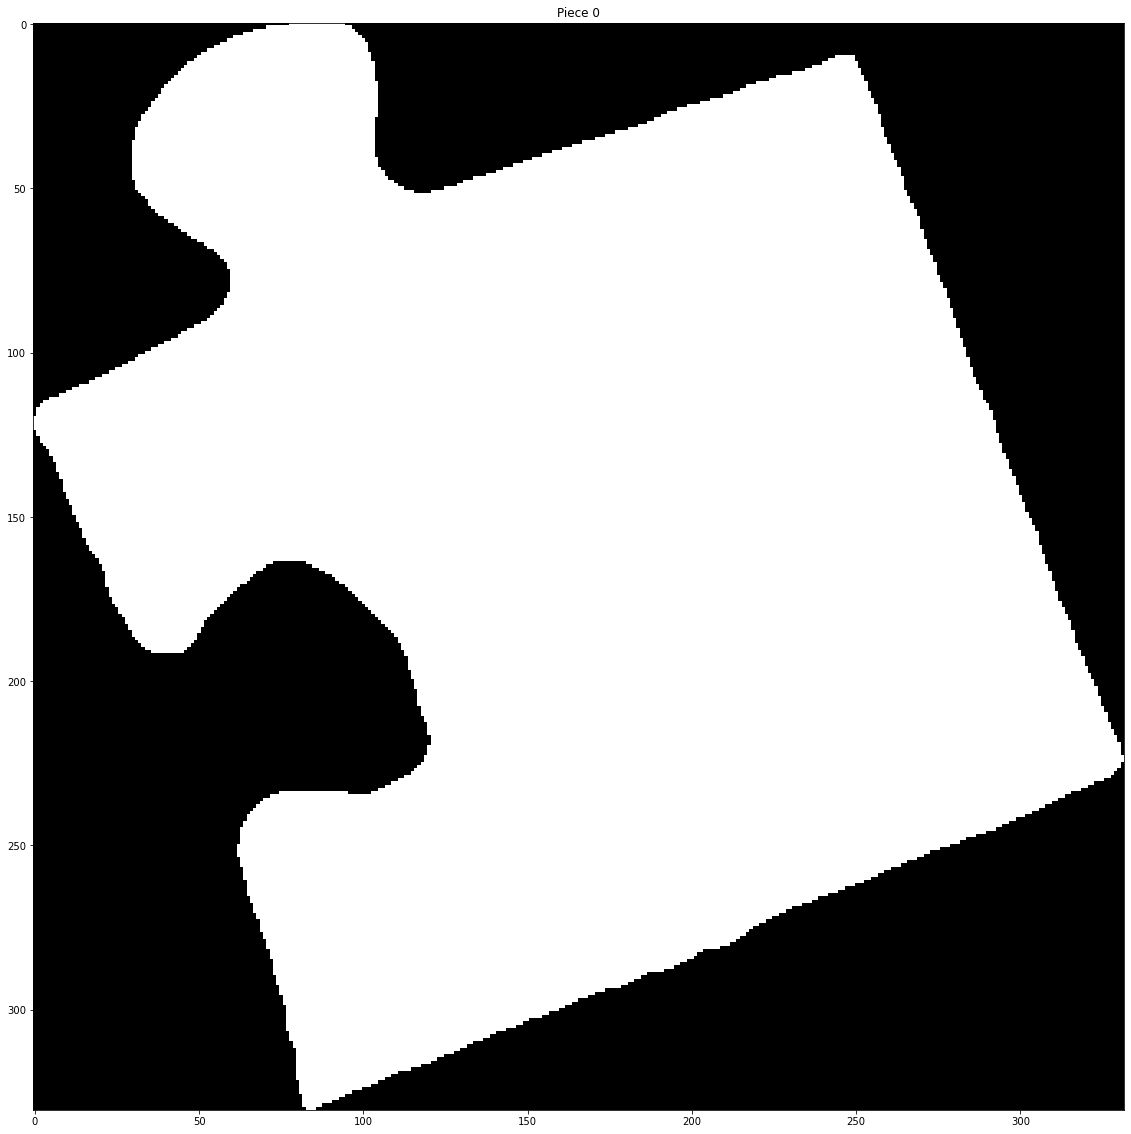

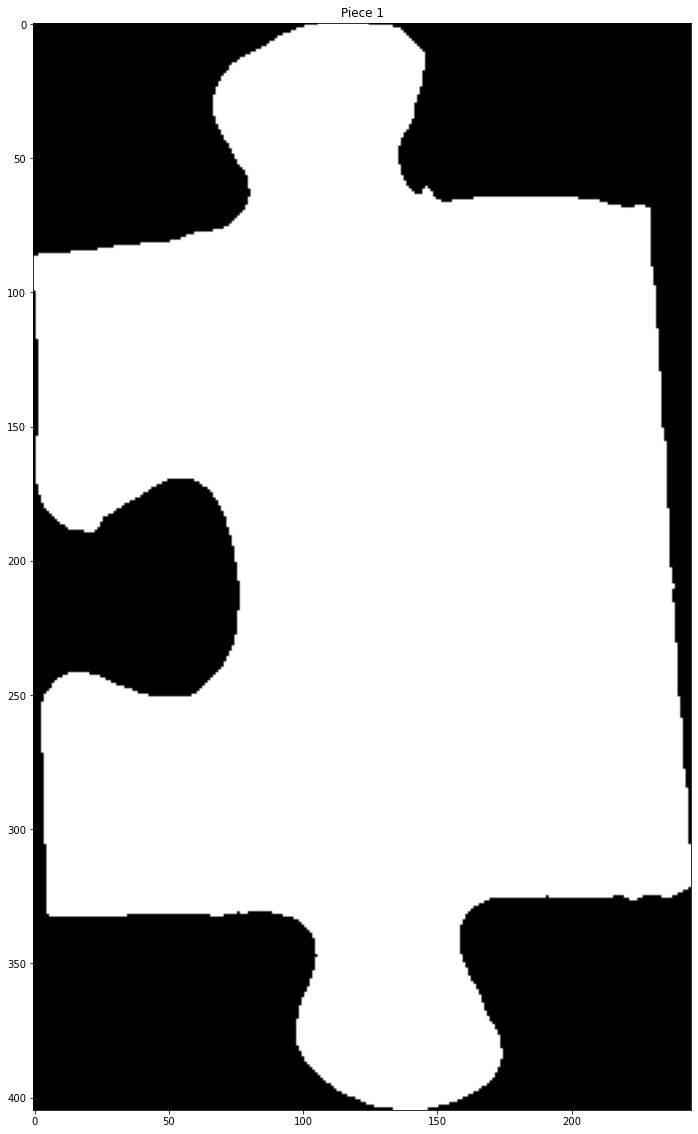

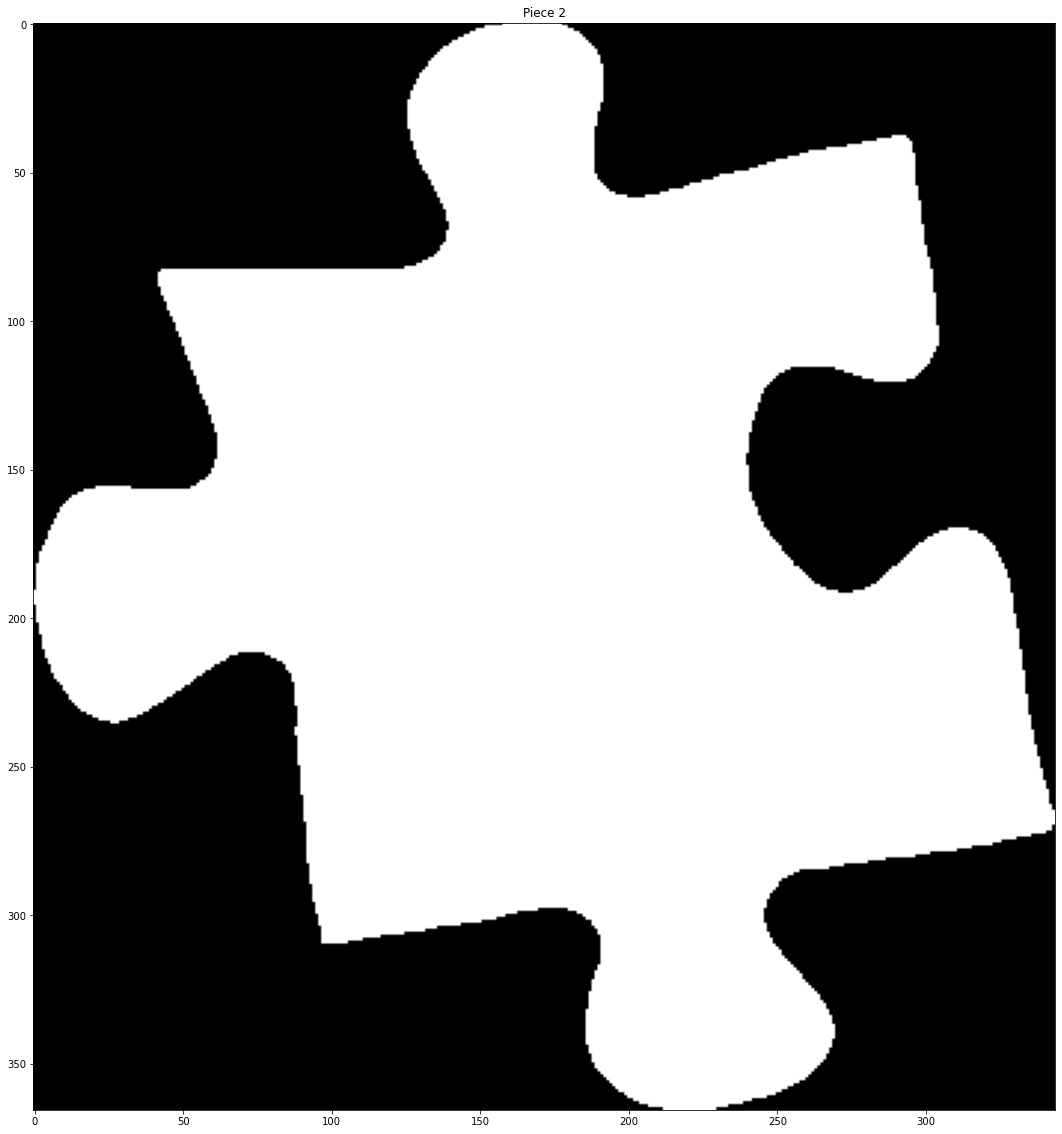

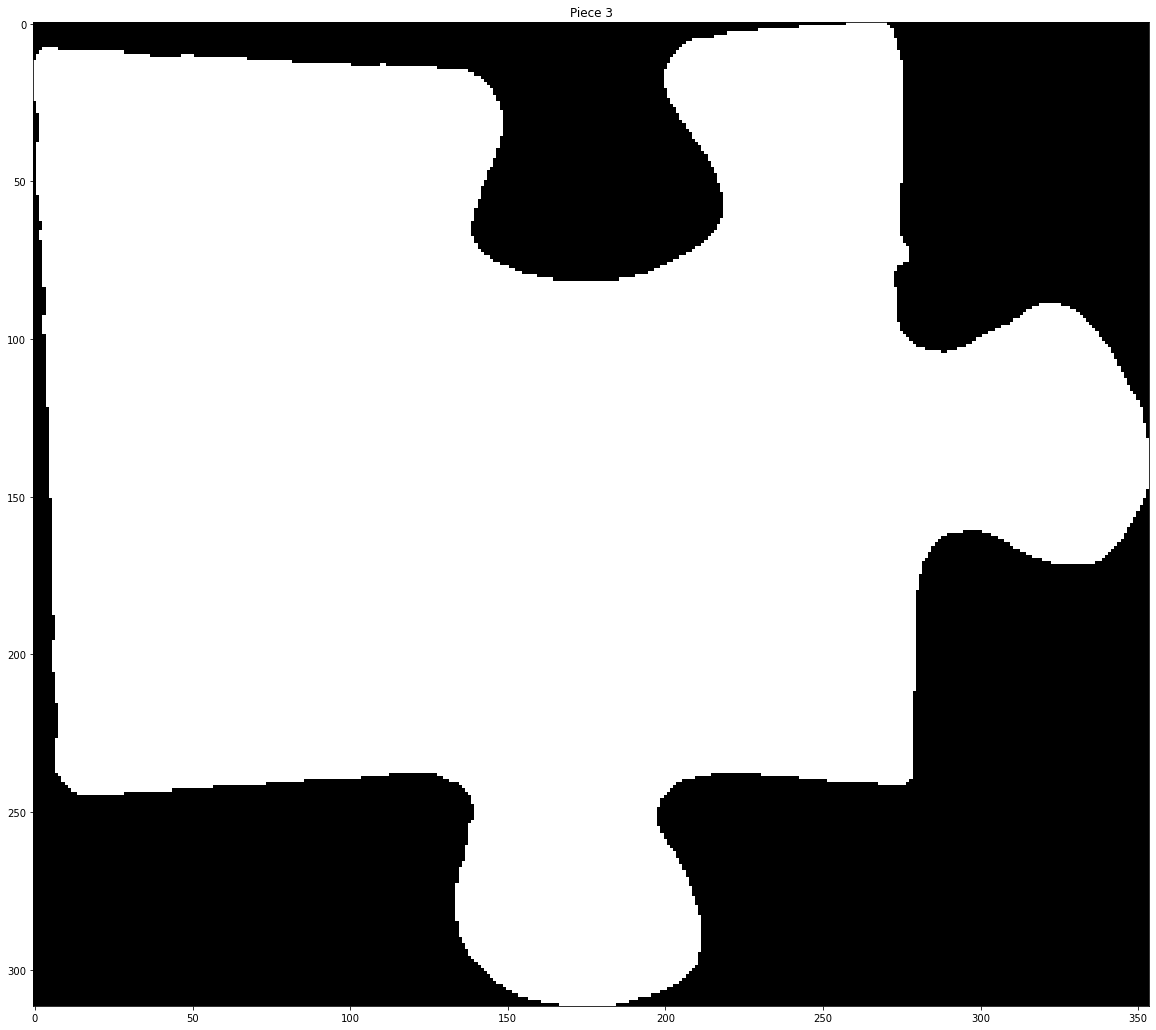

In [29]:
temp = return_puzzle_pieces(best, 4)
for i in range(4):
    plt.imshow(temp[i], cmap='gray'); plt.title(f'Piece {i}');plt.show(); plt.close()